In [144]:
#Marée Maxime 27361900
#Imports utiles
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer 
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.core.operations import *

In [145]:
#Téléchargement du ficher CIF
with MPRester("rzFNAXwVskd5hQE3") as m:
    structure = m.get_structure_by_material_id("mp-961673")

In [146]:
#Récuperer les informations sur les coordonnées des 3 atomes de la structure qui seront dans le dictionnaire
structdict = structure.as_dict() 

In [147]:
#Récupérer la maille conventionnelle car c'est sur cette maille que l'on va analyser les opérations de symétries
conventionnal = analyzestruc.get_conventional_standard_structure()
analyzeconv = SpacegroupAnalyzer(conventionnal)


# Récupération des 3 opérations de symétries :

In [149]:
#On récupère les symétries sur la maille conventionnelle
symlist = analyzeconv.get_symmetry_operations() 

#print(symlist)
sym1 = symlist[4] #5
sym2 = symlist[32] #33
sym3 = symlist[85] #86

# Première opération de symétrie sur le Ti :


In [150]:
#Opération de symétrie sur le premier atome 
atom1 = structdict['sites'][0]['label']
coordin1 = structdict['sites'][0]['abc']

print("L'atome de", atom1, "a pour coordonnées initiales", coordin1)

#Faire l'opération de symétrie sur l'atome et on récupère les coordonnées après symétrie
coord_f1 = sym1.operate(coordin1)
print("Coordonnées de l'atome", atom1,"après l'opération de symétrie :",coord_f1)

print("Matrice de rotation : ")
print(sym1.rotation_matrix)

print("Vecteur de translation : ",sym1.translation_vector)

L'atome de Ti a pour coordonnées initiales [0.5, 0.5, 0.5]
Coordonnées de l'atome Ti après l'opération de symétrie : [ 0.5 -0.5 -0.5]
Matrice de rotation : 
[[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
Vecteur de translation :  [0. 0. 0.]


# Commentaire sur l'opération de symétrie :
On effectue l'opération de symétrie qui passe d'un vecteur(x,y,z) à (y,-x,-z) :

$\begin{pmatrix}1&0&0\\ 
0&-1&0\\ 
0&0&-1\\ 
\end{pmatrix}$ 
$\begin{pmatrix}x\\ 
y\\ 
z\\ 
\end{pmatrix}$ 
$+$
$\begin{pmatrix}0\\ 
0\\ 
0\\ 
\end{pmatrix}$
$=$
$\begin{pmatrix}x\\ 
-y\\ 
-z\\ 
\end{pmatrix}$

Il s'agit d'une rotation $\textbf{d'ordre 2}$ le long d'un axe parallèle à $[100]$ c'est-à-dire un axe parallèle au vecteur de base a

# Représentation de l'opération de symétrie :

Pour mieux visualiser la symétrie que sur l'image mise, vous pouvez faire tourner le code mis en commentaire dans la cellule ci dessous sur JupyterHub

In [154]:
#view1 = quick_view(conventionnal, supercell = [1,1,1])
#display(view1)
#view1.script('draw symop 5 {atomno = 21}; select {atomno = 21}; label on; color blue')

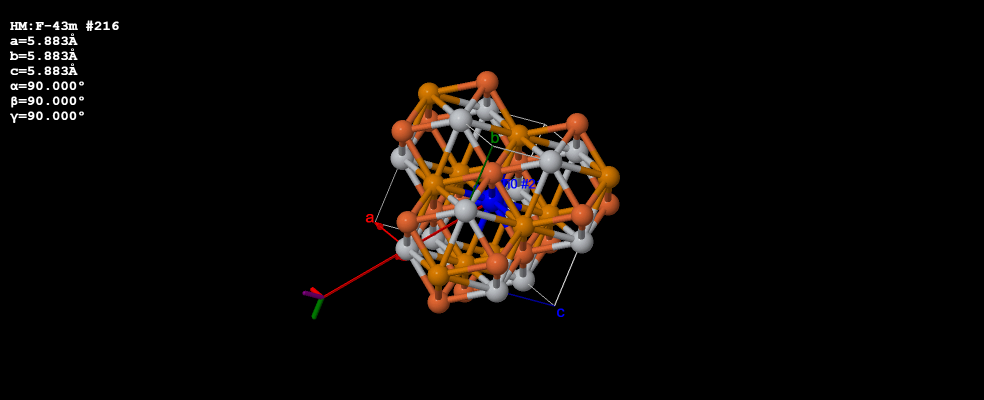


# Deuxième opération de symétrie sur le Fe

In [134]:
#Opération de symétrie sur le deuxième atome 
atom2 = structdict['sites'][1]['label']
coordin2 = structdict['sites'][1]['abc']
print("L'atome de", atom2, "a pour coordonnées initiales", coordin2)

#Faire l'opération de symétrie sur l'atome et on récupère les coordonnées après symétrie
coord_f2 = sym2.operate(coordin2)
print("Coordonnées de l'atome", atom2,"après l'opération de symétrie :",coord_f2)

print("Matrice de rotation : ")
print(sym2.rotation_matrix)

print("Vecteur de translation : ",sym2.translation_vector)


L'atome de Fe a pour coordonnées initiales [0.25, 0.25, 0.25]
Coordonnées de l'atome Fe après l'opération de symétrie : [0.75 0.75 0.25]
Matrice de rotation : 
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
Vecteur de translation :  [0.5 0.5 0. ]


# Commentaire sur l'opération de symétrie :
On effectue l'opération de symétrie qui passe d'un vecteur(x,y,z) à (z+1/2, x+1/2, y) :

$\begin{pmatrix}0&0&1\\ 
1&0&0\\ 
0&1&0\\ 
\end{pmatrix}$ 
$\begin{pmatrix}x\\ 
y\\ 
z\\ 
\end{pmatrix}$ 
$+$
$\begin{pmatrix}0.5\\ 
0.5\\ 
0\\ 
\end{pmatrix}$
$=$
$\begin{pmatrix}z+0.5\\ 
x+0.5\\ 
y\\ 
\end{pmatrix}$

Il s'agit d'une rotation $\textbf{d'ordre 3}$ le long d'un axe parallèle à $[111]$ c'est-à-dire une diagonale de la maille
Cette rotation est suivie d'une translation le long d'un vecteur (0.5, 0.5, 0)

# Représentation de l'opération de symétrie :
Pour mieux visualiser la symétrie que sur l'image mise, vous pouvez faire tourner le code mis en commentaire dans la cellule ci dessous sur JupyterHub

In [155]:
#view2 = quick_view(conventionnal, supercell = [1,1,1])
#display(view2)
#view2.script('draw symop 33 {atomno = 2};select {atomno = 2}; label on; color pink')

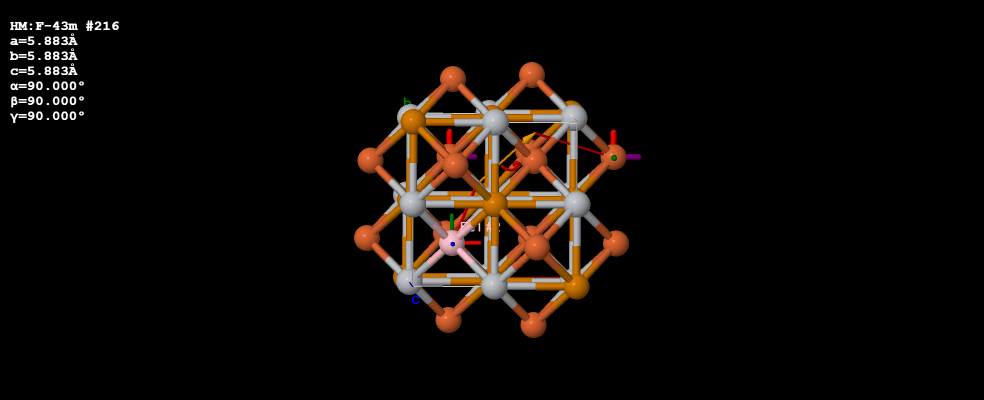

# Troisième opération de symétrie sur le Te

In [125]:
#Opération de symétrie sur le troisième atome 
atom3 = structdict['sites'][2]['label']
coordin3 = structdict['sites'][2]['abc']
print("L'atome de", atom3, "a pour coordonnées initiales", coordin3)

#Faire l'opération de symétrie sur l'atome et on récupère les coordonnées après symétrie
coord_f3 = sym3.operate(coordin3)
print("Coordonnées de l'atome", atom3,"après l'opération de symétrie :",coord_f3)

print("Matrice de rotation : ")
print(sym3.rotation_matrix)

print("Vecteur de translation : ",sym3.translation_vector)

L'atome de Te a pour coordonnées initiales [0.0, 0.0, 0.0]
Coordonnées de l'atome Te après l'opération de symétrie : [0.  0.5 0.5]
Matrice de rotation : 
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
Vecteur de translation :  [0.  0.5 0.5]


# Commentaire sur l'opération de symétrie :
On effectue l'opération de symétrie qui passe d'un vecteur(x,y,z) à (z, y+1/2, x+1/2) :

$\begin{pmatrix}0&0&1\\ 
0&1&0\\ 
1&0&0\\ 
\end{pmatrix}$ 
$\begin{pmatrix}x\\ 
y\\ 
z\\ 
\end{pmatrix}$ 
$+$
$\begin{pmatrix}0\\ 
0.5\\ 
0.5\\ 
\end{pmatrix}$
$=$
$\begin{pmatrix}z\\ 
y+0.5\\ 
x+0.5\\ 
\end{pmatrix}$

Il s'agit d'un plan miroir $\textbf{m}$ suivi d'une translation de vecteur (0,0.5,0.5)

# Représentation de l'opération de symétrie :
Pour mieux visualiser la symétrie que sur l'image mise, vous pouvez faire tourner le code mis en commentaire dans la cellule ci dessous sur JupyterHub

In [156]:
#view3 = quick_view(conventionnal, supercell = [1,1,1])
#display(view3)
#view3.script('draw symop 86 {atomno = 3}; select {atomno = 3}; label on; color green')

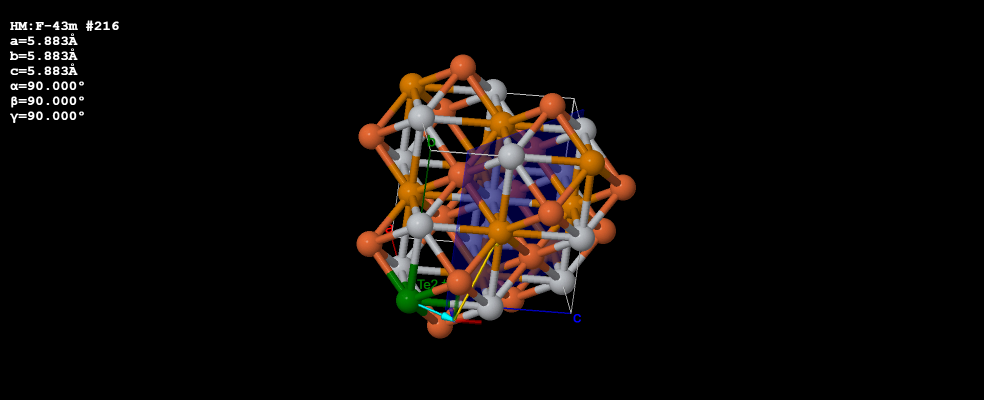